In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = iris.target

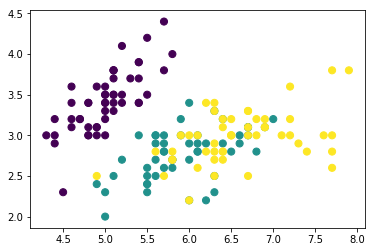

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='viridis');

Iterations:  12
Accuracy: 0.82


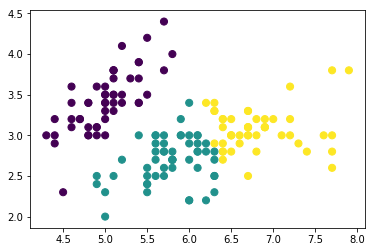

In [11]:
class MyKMeans(object):
    def __init__(self, n_clusters, random_state=1):
        self.n_clusters = n_clusters
        self.random_state = random_state
        
    def fit(self, X):
        rng = np.random.RandomState(self.random_state)
        i = rng.permutation(X.shape[0])[:self.n_clusters]
        centers = X[i]
        
        labels = []
        converge = True
        self.iterations = 0
        while converge:
            labels = self.calculate_labels(X, centers)
            new_centers = self.calculate_centers(X, labels)

            if np.all(centers == new_centers):
                converge = False
                
            centers = new_centers
            self.iterations+=1
            
        self.labels_ = labels
        self.cluster_centers_ = centers
    
    def calculate_centers(self, X, labels):
        return np.array([X[labels == i].mean(0) for i in range(self.n_clusters)])
        
    def calculate_labels(self, X, centers):
        labels = []
        for x in X:
            distances = np.array([self.euclid_distance(c, x) for c in centers])
            labels.append(np.argmin(distances))
        return np.array(labels)

    def euclid_distance(self, X, Y):
        return ((X-Y)**2).sum()**(1/2)
        

mkm = MyKMeans(n_clusters=3)
mkm.fit(X)
print("Iterations: ", mkm.iterations)
print('Accuracy: %.2f' % accuracy_score(y, mkm.labels_))
plt.scatter(X[:, 0], X[:, 1], c=mkm.labels_, s=50, cmap='viridis');


Iterations:  4


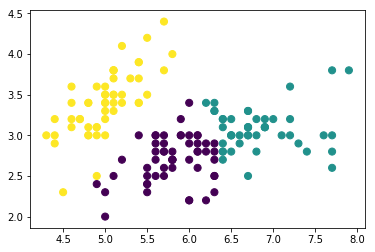

In [6]:
mkm2 = MyKMeans(n_clusters=3, random_state=33)
mkm2.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=mkm2.labels_, s=50, cmap='viridis');
print("Iterations: ", mkm2.iterations)


Iterations:  19


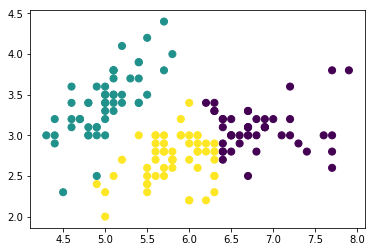

In [7]:
mkm3 = MyKMeans(n_clusters=3, random_state=9)
mkm3.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=mkm3.labels_, s=50, cmap='viridis');
print("Iterations: ", mkm3.iterations)
